In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Sun Oct 22 10:09:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import cv2
import os
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm


data = tfds.load('tf_flowers')
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# **PSBR**

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

#  *SRGAN* using

In [ ]:
from keras.models import load_model
from numpy.random import randint

generator = load_model('/content/gdrive/MyDrive/DL_Project/gen_e.h5', compile=False)

1/1 [==============================] - 3s 3s/step


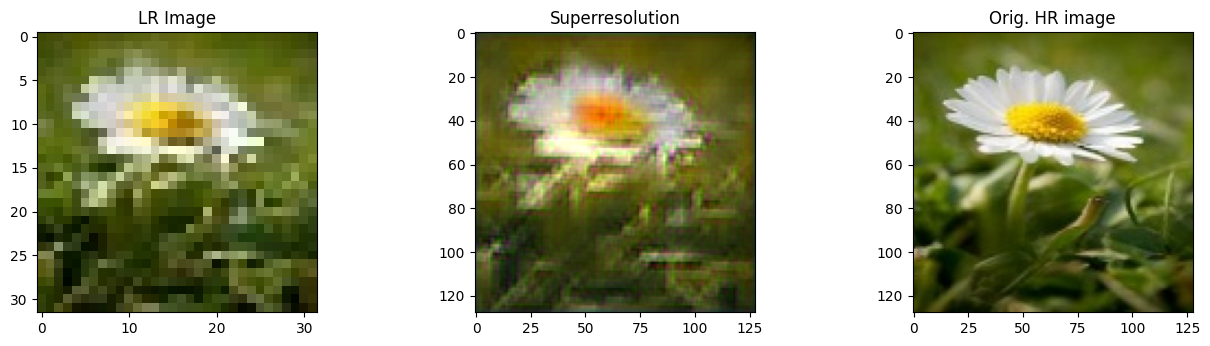

In [ ]:
sreeni_lr = cv2.imread("/content/gdrive/MyDrive/DL_Project/fl_dt/lr_images_1/daisy_1_-10790155265df092.jpg")
sreeni_hr = cv2.imread("/content/gdrive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")


sreeni_lr = cv2.cvtColor(sreeni_lr, cv2.COLOR_BGR2RGB)
sreeni_hr = cv2.cvtColor(sreeni_hr, cv2.COLOR_BGR2RGB)

sreeni_lr = sreeni_lr / 255.
sreeni_hr = sreeni_hr / 255.

sreeni_lr = np.expand_dims(sreeni_lr, axis=0)
sreeni_hr = np.expand_dims(sreeni_hr, axis=0)

generated_sreeni_hr = generator.predict(sreeni_lr)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(sreeni_lr[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(generated_sreeni_hr[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(sreeni_hr[0,:,:,:])

plt.show()

# save the generated image

In [ ]:
from PIL import Image
import numpy as np

generated_image = (generated_sreeni_hr[0] * 255).astype(np.uint8)

im = Image.fromarray(generated_image)

output_path = "/content/gdrive/MyDrive/DL_Project/fl_dt/generated/generated1.jpeg"
im.save(output_path)

print(f"Image saved at {output_path}")


Image saved at /content/gdrive/MyDrive/DL_Project/fl_dt/generated/generated1.jpeg


# PSNR of Superresoluted image and Original HR image

In [ ]:
value = PSNR(sreeni_hr, generated_sreeni_hr)
print(f"PSNR value is {value} dB")

PSNR value is 67.5189443147564 dB


## To calculate ssim of the HR and superresoluted image

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

sreeni_gr = cv2.imread("/content/gdrive/MyDrive/DL_Project/fl_dt/generated/generated1.jpeg")
sreeni_hr = cv2.imread("/content/gdrive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")


sreeni_gr = cv2.cvtColor(sreeni_gr, cv2.COLOR_BGR2RGB)
sreeni_hr = cv2.cvtColor(sreeni_hr, cv2.COLOR_BGR2RGB)

sreeni_gr = sreeni_gr / 255.0
sreeni_hr = sreeni_hr / 255.0

ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)

print(f"SSIM Score: {ssim_score}")

SSIM Score: 0.6449424944430788


<ipython-input-12-ea9508a9937f>:18: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)


# Making Autoencoder for 32x32 for LR images


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/50
391/391 [==============================] - 13s 20ms/step - loss: 0.0144 - val_loss: 0.0079
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 4/50
391/391 [==============================] - 6s 15ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 7/50
391/391 [==============================] - 4s 11ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 8/50
391/391 [==============================] - 3s 9ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 9/50
391/391 [==============================] - 3s 9ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/50
391/391 [====

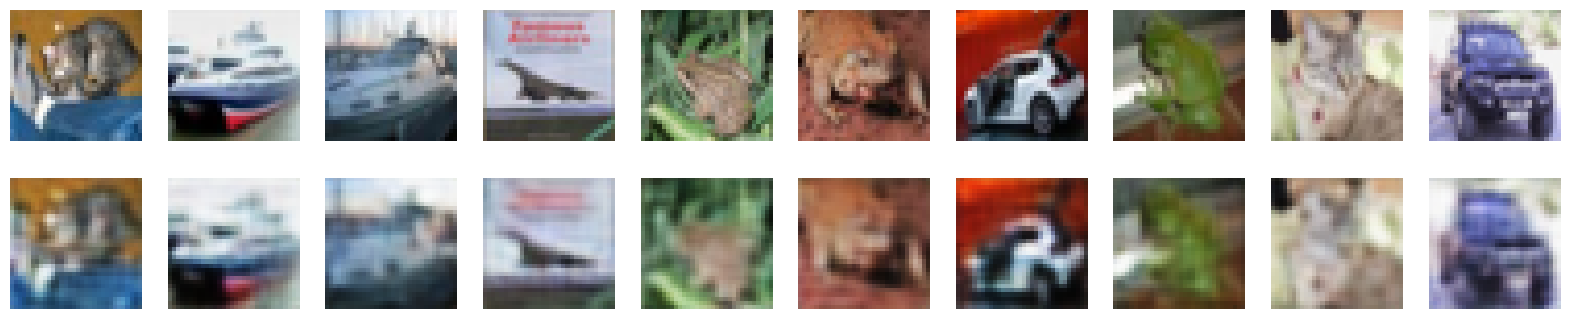

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))
decoded_images = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.axis('off')

plt.show()


In [ ]:

autoencoder.save("/content/drive/MyDrive/DL_Project/autoencoder_model_32.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Autoencoder used

1/1 [==============================] - 0s 209ms/step


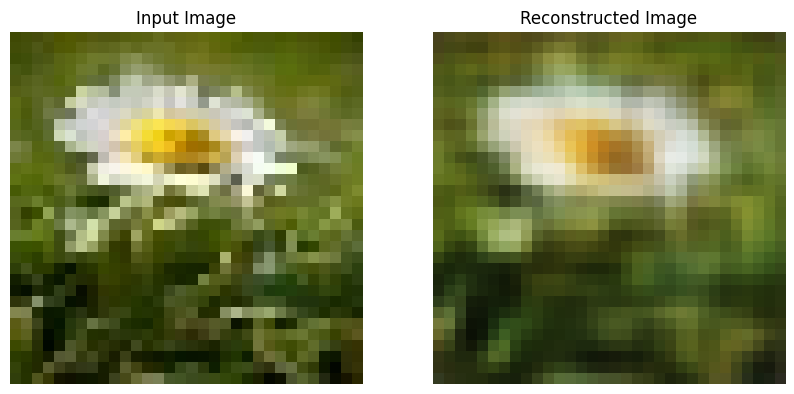

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/DL_Project/autoencoder_model_32.h5")

input_image_path = "/content/drive/MyDrive/DL_Project/fl_dt/lr_images_1/daisy_1_-10790155265df092.jpg"


if os.path.exists(input_image_path):

    input_image = cv2.imread(input_image_path)

    if input_image is not None:
        # Continue with image processing
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        input_image = cv2.resize(input_image, (32, 32))  # Resize to 32x32 (matching autoencoder input size)
        input_image = input_image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

        # Perform image reconstruction using the loaded autoencoder
        reconstructed_image = loaded_autoencoder.predict(np.expand_dims(input_image, axis=0))

        # Visualize the input and reconstructed images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Input Image')
        plt.imshow(input_image)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('Reconstructed Image')
        plt.imshow(reconstructed_image[0])
        plt.axis('off')

        plt.show()
    else:
        print("Failed to load the input image. Check the image format and content.")
else:
    print(f"File not found at path: {input_image_path}")


## save the reconst image after Autoencoder


In [ ]:
from PIL import Image
import numpy as np

generated_image = (reconstructed_image[0] * 255).astype(np.uint8)
im = Image.fromarray(generated_image)

output_path = "/content/drive/MyDrive/DL_Project/fl_dt/reconst_32/reconst1.jpeg"
im.save(output_path)

print(f"Image saved at {output_path}")

Image saved at /content/drive/MyDrive/DL_Project/fl_dt/reconst_32/reconst1.jpeg


# this 32x32 autoencoded image is now given to srgan

1/1 [==============================] - 0s 23ms/step


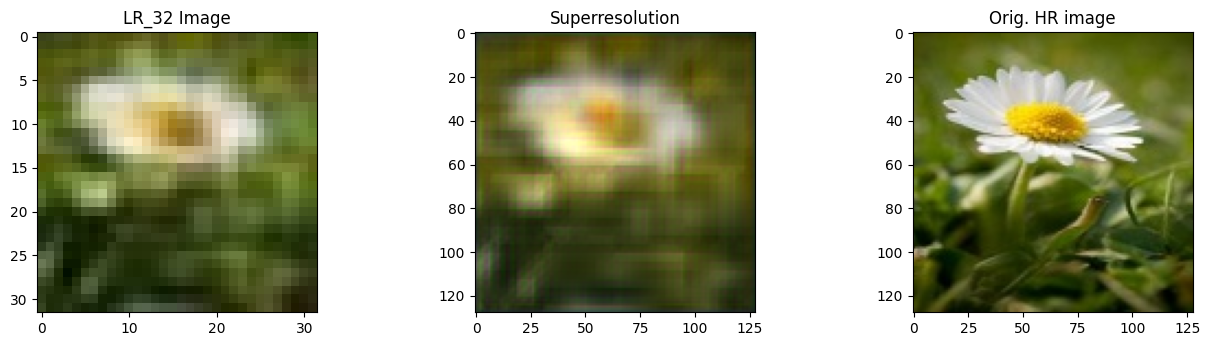

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the LR_32 image
sreeni_lr_32 = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/reconst_32/reconst1.jpeg")
sreeni_lr_32 = cv2.cvtColor(sreeni_lr_32, cv2.COLOR_BGR2RGB)
sreeni_lr_32 = sreeni_lr_32 / 255.
sreeni_lr_32 = np.expand_dims(sreeni_lr_32, axis=0)

# Load the HR image
sreeni_hr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")
sreeni_hr = cv2.cvtColor(sreeni_hr, cv2.COLOR_BGR2RGB)
sreeni_hr = sreeni_hr / 255.
sreeni_hr = np.expand_dims(sreeni_hr, axis=0)

# Check if the HR image and LR_32 image were loaded successfully
if sreeni_lr_32 is not None and sreeni_hr is not None:
    generated_sreeni_hr_1 = generator.predict(sreeni_lr_32)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('LR_32 Image')
    plt.imshow(sreeni_lr_32[0, :, :, :])
    plt.subplot(232)
    plt.title('Superresolution')
    plt.imshow(generated_sreeni_hr_1[0, :, :, :])
    plt.subplot(233)
    plt.title('Orig. HR image')
    plt.imshow(sreeni_hr[0, :, :, :])

    plt.show()
else:
    print("Failed to load the HR or LR_32 image. Check the file paths and image formats.")


# PSNR of Superresoluted image 32 and Original HR image

In [ ]:
value = PSNR(sreeni_hr, generated_sreeni_hr_1)
print(f"PSNR value is {value} dB")

PSNR value is 66.33437075504463 dB


In [ ]:
from PIL import Image
import numpy as np

# Convert the NumPy array to a valid PIL Image
generated_image_1 = (generated_sreeni_hr_1[0] * 255).astype(np.uint8)  # Scale values to 0-255

# Create a PIL Image
im = Image.fromarray(generated_image_1)

# Save the image
output_path = "/content/drive/MyDrive/DL_Project/fl_dt/generated/generated1_1.jpeg"
im.save(output_path)

print(f"Image saved at {output_path}")

Image saved at /content/drive/MyDrive/DL_Project/fl_dt/generated/generated1_1.jpeg


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

sreeni_gr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/generated/generated1_1.jpeg")
sreeni_hr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")


sreeni_gr = cv2.cvtColor(sreeni_gr, cv2.COLOR_BGR2RGB)
sreeni_hr = cv2.cvtColor(sreeni_hr, cv2.COLOR_BGR2RGB)

# Normalize the pixel values to the range [0, 1]
sreeni_gr = sreeni_gr / 255.0
sreeni_hr = sreeni_hr / 255.0

# Calculate SSIM
ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)

print(f"SSIM Score: {ssim_score}")

SSIM Score: 0.5427467318306104


<ipython-input-31-94adb9db30ab>:17: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)
